# Import libraries:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
import itertools
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import os

## Read data: 

In [2]:
data = pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

# Some investigation on data :

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

### Look for missing values in Train data:

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Look for missing values in Test data

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Looking for Percentage of missing value in both data

In [7]:
precent_null_train = data.isnull().sum().sum()/np.product(data.shape)*100
precent_null_test = test.isnull().sum().sum()/np.product(test.shape)*100

print('Percetnage of null values in train data: ',precent_null_train)
print('-'*60)
print('Percetnage of null values in test data: ',precent_null_test)

Percetnage of null values in train data:  8.099513655069211
------------------------------------------------------------
Percetnage of null values in test data:  9.00391474554154


In [8]:
precent_null_train_cabin= data['Cabin'].isnull().sum()/data.shape[0]*100
precent_null_test_cabin= test['Cabin'].isnull().sum()/test.shape[0]*100
print('Percentage of null values in column Cabin in train data: ',precent_null_train_cabin)
print('-'*60)
print('Percentage of null values in column Cabin in test data: ',precent_null_test_cabin)

Percentage of null values in column Cabin in train data:  77.10437710437711
------------------------------------------------------------
Percentage of null values in column Cabin in test data:  78.22966507177034


As we can see here 77% of data in Cabin column are missing, so drop this column since it doesnt provide usefull information.

In [9]:
#drop cabin column
data.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [10]:
#drop ticket column
data.drop('Ticket',axis=1,inplace=True)
test.drop('Ticket',axis=1,inplace=True)

### Plots:

<AxesSubplot: xlabel='Survived', ylabel='count'>

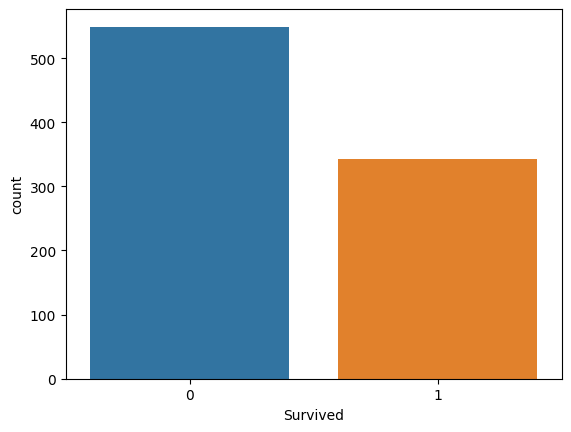

In [11]:
sns.countplot(x='Survived',data=data)

<AxesSubplot: xlabel='Survived', ylabel='count'>

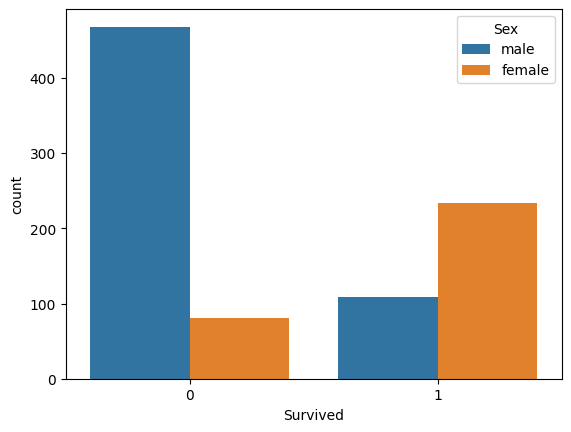

In [12]:
sns.countplot(x='Survived',hue='Sex',data=data)


<AxesSubplot: xlabel='Survived', ylabel='count'>

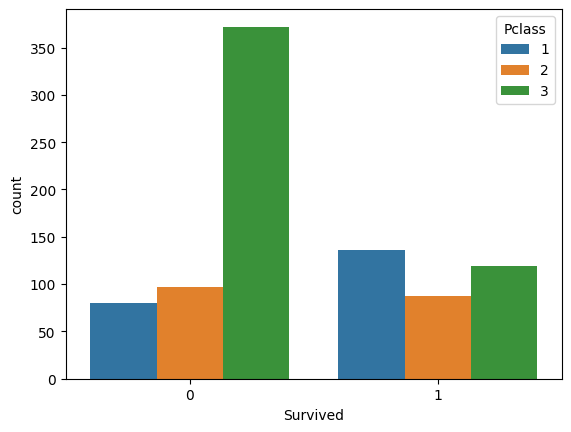

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=data)


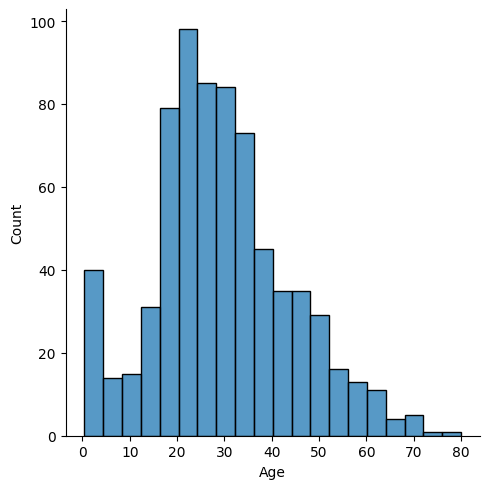

In [14]:
sns.displot(data['Age'].dropna())

<AxesSubplot: xlabel='SibSp', ylabel='count'>

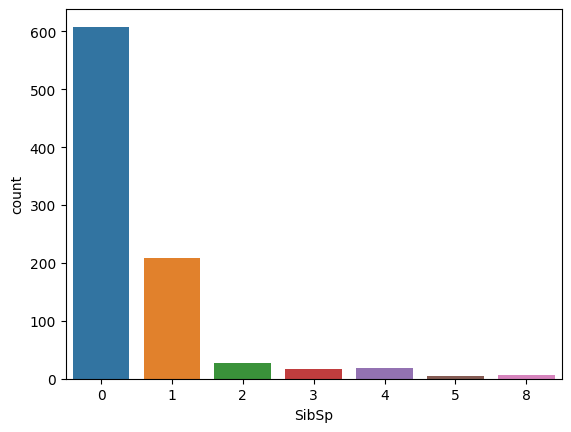

In [15]:
sns.countplot(x='SibSp', data=data)

<AxesSubplot: >

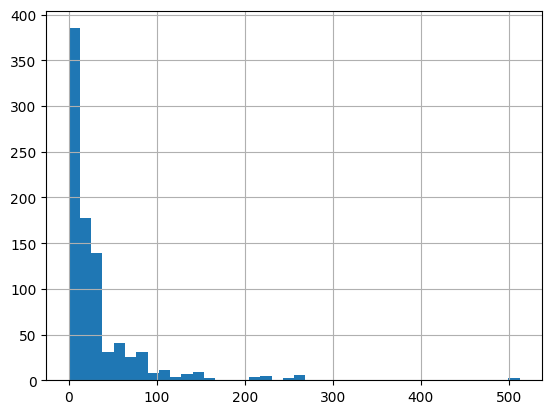

In [16]:
data['Fare'].hist(bins=40)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

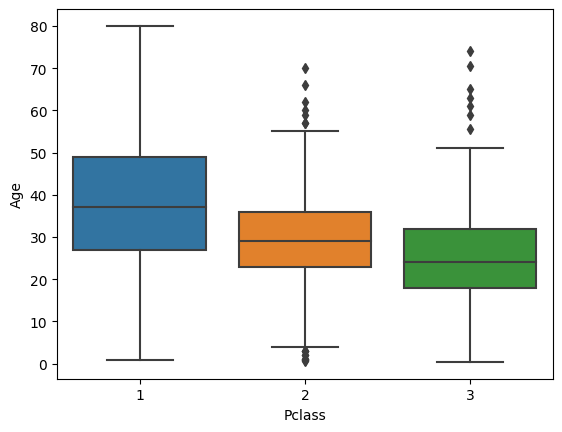

In [17]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [18]:
#divided age to for  categgory kid, , tennger, adult and adged to look for wthic category is most survived
data['life_stage']=0

for i in data['Age'].index:
    if data['Age'].loc[i] in list(range(1,11)):
        data['life_stage'].loc[i]= 'Kid'
        
    if data['Age'].loc[i] in list(range(11,21)):
        data['life_stage'].loc[i]= 'Tennger'
        
    if data['Age'].loc[i] in list(range(21,51)):
        data['life_stage'].loc[i]= 'adult'
    
    if data['Age'].loc[i] in list(range(51,120)):
        data['life_stage'].loc[i]= 'adged'

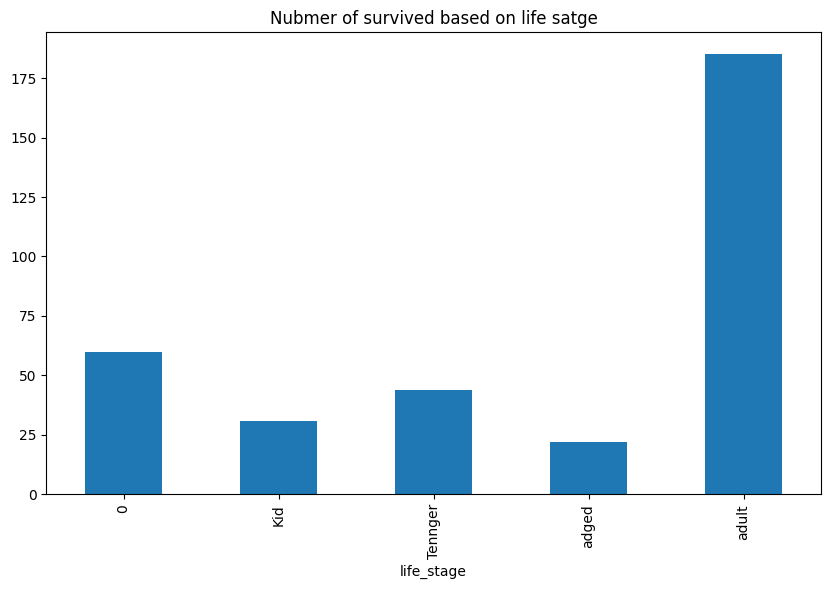

In [19]:
data.groupby('life_stage').sum()['Survived'].plot(kind='bar',figsize=(10,6))
plt.title('Nubmer of survived based on life satge')
plt.show();

Here we added a new column represnt life stage based on adges.

### Handling Missing values:

In [20]:
#Impute Age column with "Mean" of each class

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [21]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)
test['Age']=test[['Age','Pclass']].apply(impute_age,axis=1)

In [22]:
#All 177 null values in Age column disappeared
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
life_stage     0
dtype: int64

In [23]:
#Filling missing value in Embarked column with previous value 
data.Embarked.fillna(method='bfill',inplace=True)

#Filling missing value in Fare column with previous value 
test.Fare.fillna(method='bfill',inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  life_stage   891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [26]:
#looking for duplicated rows in both data
data.duplicated().sum(),test.duplicated().sum()

(0, 0)

Fortunately no duplicated values in both datasets (Train and Test).

In [27]:
#quick statistics describtion on the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In age column min age is 0.42, so we need to normlize age data.

In [28]:
#Looking for all value under 1, multiplay *100 and covert all column to int
age_index = data[data['Age']<1].index
data.Age.loc[age_index]= data.Age.loc[age_index]*100
data['Age'] = data['Age'] .astype(int)

In [29]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.630752,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.645492,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,92.000000,8.000000,6.000000,512.329200


Looking for unqiue values in categorical columns:


In [30]:
data[['Survived','Pclass','Sex','SibSp','Parch','Embarked','life_stage']].nunique()

Survived      2
Pclass        3
Sex           2
SibSp         7
Parch         7
Embarked      3
life_stage    5
dtype: int64

In [31]:
#This function is used to encode categorical column with ONE HOT ENCODING APPROCHE
def oh_encoding(X):
    # Select categorical columns 
    categorical_cols = X.select_dtypes(include='object')

    # Select numerical columns
    numerical_cols = X.select_dtypes(exclude='object')


    # Apply one-hot encoder to each column with categorical data
    OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    OH_X_full = pd.DataFrame(OH_encoder.fit_transform(categorical_cols))

    # One-hot encoding removed index; put it back
    OH_X_full.index = categorical_cols.index

    # Add one-hot encoded columns to numerical features
    OH_X = pd.concat([numerical_cols, OH_X_full], axis=1)
    return OH_X

In [32]:
#select target column 
y = data['Survived']

#select indempendant columns
X = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

#get indempendant column for train data set
X_full = data[X].copy()

#get indempendant column for test data set
X_test = test[X].copy()



#Use train test split approche
X_train, X_valid, y_train, y_valid = train_test_split(oh_encoding(X_full), y,train_size=0.8, test_size=0.2, random_state=0)

# Modelling

## Logistic Regression

In [33]:
LR_model = LogisticRegression(C=0.01, solver='liblinear')
LR_model.fit(X_train,y_train) 
prediction_lr = LR_model.predict(X_valid)
print('accuracy score for Logistic Regression',accuracy_score(y_valid,prediction_lr))

accuracy score for Logistic Regression 0.7821229050279329


In [34]:
#Actual = y_valid
#Predicted = prediction_lr

# Compute confusion matrix
cnf_matrix_lr = confusion_matrix(y_valid,prediction_lr, labels=LR_model.classes_)
print ("Confusion Matrix:\n",cnf_matrix_lr)

Confusion Matrix:
 [[106   4]
 [ 35  34]]


<Figure size 1000x800 with 0 Axes>

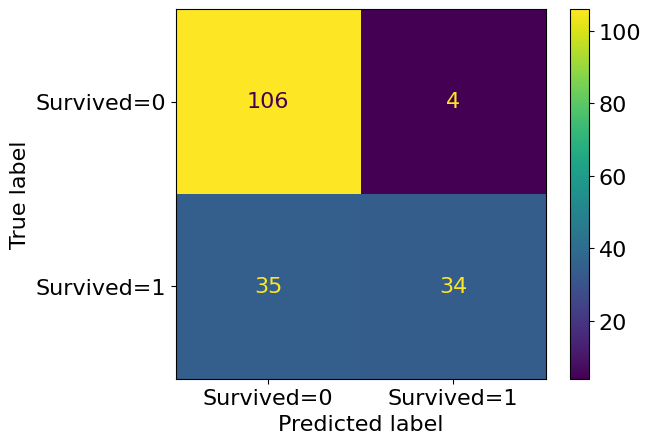

In [35]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plt.rcParams['font.size'] = '16'
cm_display = ConfusionMatrixDisplay(cnf_matrix_lr, display_labels=['Survived=0','Survived=1'])
cm_display.plot()

# Predictions Scores

In [36]:
accu_preds = [prediction_lr]

accu_df = pd.DataFrame(index=[
                              'Logistic Regression',
                             ])

accu_df['Acuuracy_score']=[accuracy_score(y_valid,i) for i in accu_preds]
accu_df['F1_score']=[f1_score(y_valid, i, average='weighted')  for i in accu_preds]
accu_df['Jaccard_score']=[jaccard_score(y_valid, i,pos_label=0)  for i in accu_preds]
accu_df

,Acuuracy_score,F1_score,Jaccard_score
Logistic Regression,0.782123,0.764016,0.731034


In [37]:
model= LR_model

# Preprocessing of training data, fit model 
model.fit(oh_encoding(X_full), y)

# Preprocessing of validation data, get predictions
predictions = model.predict(oh_encoding(X_test))

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
